# Image processing reverse engineering with NN
### www.datosimagensonido.com
[Ingeniería inversa de procesado de imagen con redes neuronales](https://www.datosimagensonido.com/2019/04/ingenieria-inversa-de-procesado-de.html)

## Libraries needed

In [1]:
import os
import imageio  # read/write image formats
import pickle  # to save/load model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor  # our MLP!

## Reading training set (images)

In [2]:
features = imageio.imread('RGB16Million.png')  # courtesy of www.brucelindbloom.com
targets  = imageio.imread('RGB16Million_processed.png')

HEIGHT = features.shape[0]
WIDTH  = features.shape[1]

print("Images have HEIGHT =", HEIGHT, "and WIDTH =", WIDTH)
print("Total number of training examples is", HEIGHT * WIDTH)

Images have HEIGHT = 4096 and WIDTH = 4096
Total number of training examples is 16777216


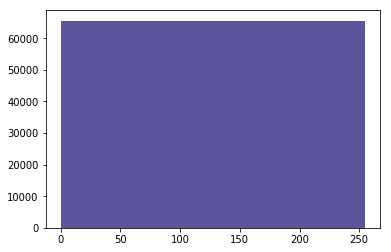

In [3]:
# Features histogram (flat since it contains once every possible value)
R = features[:, :, 0].flatten()
G = features[:, :, 1].flatten()
B = features[:, :, 2].flatten()

plt.hist(R, bins=256, color='r', alpha=0.4)
plt.hist(G, bins=256, color='g', alpha=0.4)
plt.hist(B, bins=256, color='b', alpha=0.4)
plt.show();

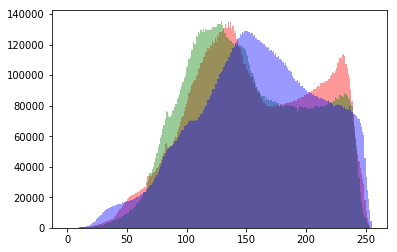

In [4]:
# Targets histogram
R_ = targets[:, :, 0].flatten()
G_ = targets[:, :, 1].flatten()
B_ = targets[:, :, 2].flatten()

plt.hist(R_, bins=256, color='r', alpha=0.4)
plt.hist(G_, bins=256, color='g', alpha=0.4)
plt.hist(B_, bins=256, color='b', alpha=0.4)
plt.show();

## Neural network layout and training

In [5]:
# Convert images into long 2D arrays in the [0..1] range
X = np.column_stack((R, G, B)) / 255
Y = np.column_stack((R_, G_, B_)) / 255

In [6]:
# Save memory
del features, targets, R, G, B, R_, G_, B_
%whos

Variable       Type       Data/Info
-----------------------------------
HEIGHT         int        4096
MLPRegressor   ABCMeta    <class 'sklearn.neural_ne<...>perceptron.MLPRegressor'>
WIDTH          int        4096
X              ndarray    16777216x3: 50331648 elems, type `float64`, 402653184 bytes (384.0 Mb)
Y              ndarray    16777216x3: 50331648 elems, type `float64`, 402653184 bytes (384.0 Mb)
imageio        module     <module 'imageio' from 'C<...>s\\imageio\\__init__.py'>
np             module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
os             module     <module 'os' from 'C:\\Us<...>vs\\py36env\\lib\\os.py'>
pickle         module     <module 'pickle' from 'C:<...>py36env\\lib\\pickle.py'>
plt            module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


In [104]:
# Define and train MLP
regr = MLPRegressor(solver='adam',  # solver algorithm ('sgd', lbfgs')
                    alpha=0,        # no L2 (ridge regression) regularization
                    hidden_layer_sizes=(64,64),  # tuple defining layers and nodes
                    activation='logistic',  # hidden layers activation function (default 'relu') 
                                            # 'logistic' (sigmoid) works better than 'relu' and 'tanh'
                    max_iter=40,            # max epochs
                    tol=0.0000001,          # tolerance for early stopping
                    n_iter_no_change=10,    # number of epochs to check tol
                    random_state=42,        # guarantee reproducible training
                    verbose=True)           # tell me a story
regr.out_activation_ = 'identity'  # output layer activation function (default 'identity')
                                   # 'identity' is adequate for regression
regr.fit(X, Y)

Iteration 1, loss = 0.00047130
Iteration 2, loss = 0.00004503
Iteration 3, loss = 0.00002487
Iteration 4, loss = 0.00001743
Iteration 5, loss = 0.00001426
Iteration 6, loss = 0.00001215
Iteration 7, loss = 0.00001040
Iteration 8, loss = 0.00000902
Iteration 9, loss = 0.00000803
Iteration 10, loss = 0.00000732
Iteration 11, loss = 0.00000681
Iteration 12, loss = 0.00000639
Iteration 13, loss = 0.00000604
Iteration 14, loss = 0.00000573
Iteration 15, loss = 0.00000545
Iteration 16, loss = 0.00000519
Iteration 17, loss = 0.00000496
Iteration 18, loss = 0.00000475
Iteration 19, loss = 0.00000456
Iteration 20, loss = 0.00000440
Iteration 21, loss = 0.00000424
Iteration 22, loss = 0.00000408
Iteration 23, loss = 0.00000393
Iteration 24, loss = 0.00000379
Iteration 25, loss = 0.00000366
Iteration 26, loss = 0.00000355
Iteration 27, loss = 0.00000345
Iteration 28, loss = 0.00000336
Iteration 29, loss = 0.00000329
Iteration 30, loss = 0.00000321
Iteration 31, loss = 0.00000315
Iteration 32, los

MLPRegressor(activation='logistic', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=40, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=1e-07,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [105]:
# Save MLP
with open('mlp_64_64_logistic_identity.pkl', 'wb') as f:
    pickle.dump(regr, f)

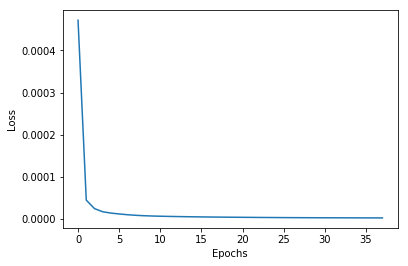

In [106]:
# Plot error vs epoch
plt.plot(regr.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('Epochs');

In [107]:
# MLP weights
regr.coefs_

[array([[ 4.50649366e+00, -1.01134902e+00,  1.20788868e+00,
         -1.06058426e+01, -1.11703746e+00, -5.61507266e-01,
         -7.15455508e+00,  2.18338619e+00, -1.72836360e+00,
         -2.75812588e-01, -2.75765662e+00,  4.48298550e-02,
         -2.98189263e+00, -2.16042205e+00, -4.20679149e+00,
          6.27738451e+00, -1.43471310e+01, -5.99188607e+00,
         -4.42642098e+00,  8.23813857e-01, -9.73595846e-01,
         -2.32860327e+00, -8.04676393e+00,  2.38373133e+00,
          2.07654481e+00,  8.79827733e+00,  3.94327058e+00,
         -1.44797504e+01, -2.45368903e+00, -4.57711522e+00,
          1.35885282e+01, -1.78859399e+00, -1.20932095e+00,
          1.77629523e+00, -6.29861749e-01,  4.84762366e+00,
         -4.18244802e+00, -7.69537638e+00, -1.70084340e+00,
         -1.45886039e+00,  6.62424302e-03,  1.65322537e+01,
          1.31866844e+00,  1.44744107e+00, -5.17443254e+00,
         -3.83659133e-01, -3.57308619e+00,  4.22957978e+00,
          8.94663993e-03, -4.14280507e+0

In [108]:
# MLP biases
regr.intercepts_

[array([ 0.54017443, -5.4630191 , -7.37108181,  0.29767981, -0.89838465,
        -3.4098138 , -2.30671533,  1.85575396, -0.48667875, -4.17206484,
        -3.49801841, -4.14063662, -0.99250395,  3.85230971, -0.08521387,
        -1.09207897, -0.10624035,  3.76550339,  0.0353639 , -0.09992577,
        -0.23367071,  0.50862985, -1.13078914,  1.45767093, -0.46252094,
        -6.17887522, -1.93939925,  2.49681353,  2.38733622, -3.03110513,
        -3.14339618, -0.50753239, -1.22787298, -5.00767683, -0.60488982,
        -3.93597303,  1.85159697, -0.71382713, -0.61893124,  0.45621521,
         1.93241578, -3.48726935, -6.09049438, -2.46740662, -1.80297639,
        -0.60346401,  1.30093281, -3.86941968, -3.82300313, -2.46673912,
        -2.60001636, -1.32188583, -3.27114851,  0.74364838, -3.79024342,
        -2.10584242,  6.78782676,  0.052702  , -4.09708646, -0.95747607,
        -0.67540274, -3.43152531,  7.69287728, -3.59739428]),
 array([ 4.47427102e-01, -2.64809153e-01, -4.29910170e-01,  5.

## Neural network prediction

In [88]:
# Load MLP (once trained and saved)
"""
with open('mlp_64_64_logistic_identity.pkl', 'rb') as f:
    regr = pickle.load(f)
"""

In [3]:
# Read image to process (unseen by the NN)
img_test = imageio.imread('wendolin.png')

HEIGHT = img_test.shape[0]
WIDTH  = img_test.shape[1]

# Extract RGB channels
R = img_test[:, :, 0].flatten()
G = img_test[:, :, 1].flatten()
B = img_test[:, :, 2].flatten()

X_test = np.column_stack((R, G, B)) / 255

In [4]:
# Prediction
Y_pred = regr.predict(X_test)

# Keep in range [0..1]
Y_pred[Y_pred < 0] = 0.0
Y_pred[Y_pred > 1] = 1.0

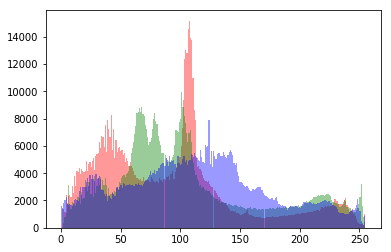

In [5]:
# Prediction histogram
R_ = np.round(Y_pred[:, 0] * 255).astype(int)
G_ = np.round(Y_pred[:, 1] * 255).astype(int)
B_ = np.round(Y_pred[:, 2] * 255).astype(int)

plt.hist(R_, bins=256, color='r', alpha=0.4)
plt.hist(G_, bins=256, color='g', alpha=0.4)
plt.hist(B_, bins=256, color='b', alpha=0.4)
plt.show();

In [112]:
# Build prediction image
R_pred = Y_pred[:, 0].reshape(HEIGHT, WIDTH)
G_pred = Y_pred[:, 1].reshape(HEIGHT, WIDTH)
B_pred = Y_pred[:, 2].reshape(HEIGHT, WIDTH)

prediction = np.zeros((HEIGHT, WIDTH, 3), dtype=np.float64)
prediction[:, :, 0] = R_pred
prediction[:, :, 1] = G_pred
prediction[:, :, 2] = B_pred

prediction = np.round(prediction * 255).astype('uint8')  # range [0..255]

print("Min / Max predicted values:", np.min(prediction), "/", np.max(prediction))

Min / Max predicted values: 0 / 255


In [113]:
# Save prediction
imageio.imwrite('pred_wendolin_64_64_logistic_identity.png', prediction)